In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd

from csv import reader
import skimage
from skimage import io, transform, exposure, data, color
from skimage.color import *

BBBC038 = "/raid/data/BBBC038/"
training_imgs_dir = "/raid/data/BBBC038/training/"

# View sample image

In [2]:
sample_dir = "/raid/data/BBBC038/training/ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0bdab5a00af0e18435c0/"
# os.listdir(sample_dir + 'masks/')
# io.imshow(sample_dir + 'images/ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0bdab5a00af0e18435c0.png')

# Load All Data

/opt/tljh/user/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


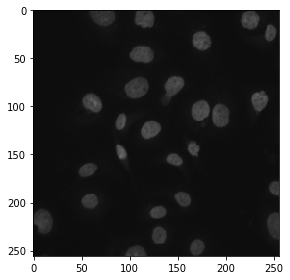

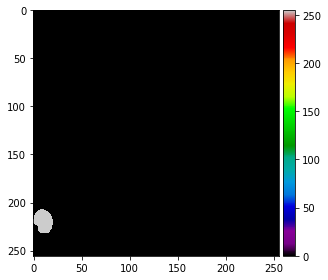

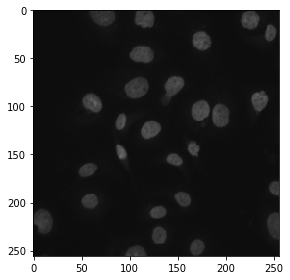

In [3]:
from functions.load_all_data import load_imgs_masks

img_objs, mask_colls, img_paths = load_imgs_masks()
io.imshow(img_paths[0], cmap='nipy_spectral'); plt.figure()
io.imshow(mask_colls[0][0], cmap='nipy_spectral'); plt.figure()
io.imshow(img_objs[0], cmap='nipy_spectral')

In [4]:
from functions.load_all_data import load_data_by_color
all_img_objs, all_img_paths, all_mask_colls = load_data_by_color()

def_img_objs, def_mask_colls, def_img_paths = load_data_by_color(color="Default")
bw_img_objs, bw_mask_colls, bw_img_paths = load_data_by_color(color="TissueBW")
purple_img_objs, purple_mask_colls, purple_img_paths = load_data_by_color(color="Purple")
pink_img_objs, pink_mask_colls, pink_img_paths = load_data_by_color(color="Pink-Purple")

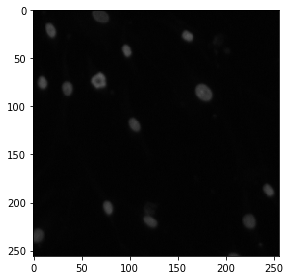

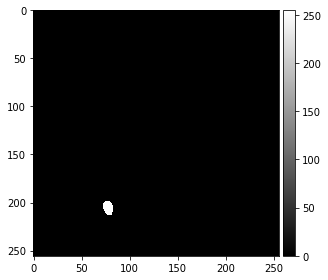

In [5]:
io.imshow(def_img_objs[1]); plt.figure()
io.imshow(def_mask_colls[1][0], cmap='gray')

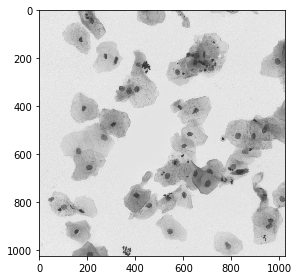

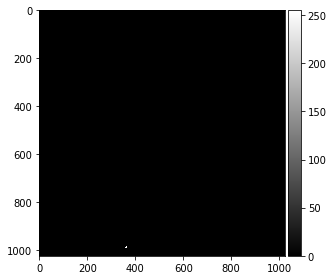

In [6]:
io.imshow(bw_img_objs[1]); plt.figure()
io.imshow(bw_mask_colls[1][0], cmap='gray')

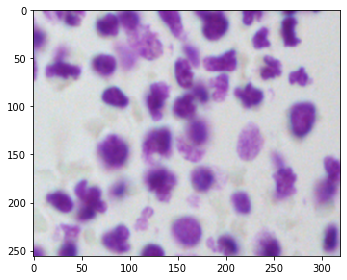

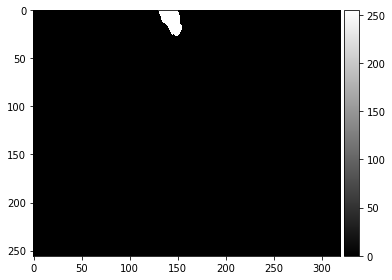

In [7]:
io.imshow(purple_img_objs[5]); plt.figure()
# first index is image collection, second is mask within collection
io.imshow(purple_mask_colls[5][0], cmap='gray')

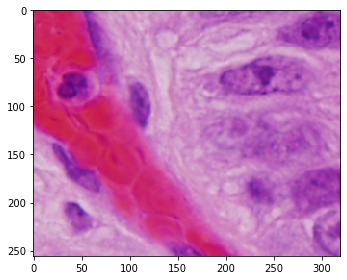

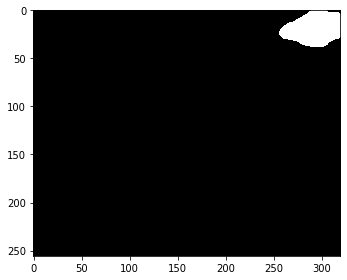

In [8]:
io.imshow(pink_img_objs[0]); plt.figure()
io.imshow(pink_mask_colls[0][0])

# Load All Labeled Data

In [9]:
from functions.load_all_data import load_labeled_data

image_groups, table_entries, csv_lines = load_labeled_data()

# print(table_entries[1], end='\n\n')
# print(csv_lines[1], end='\n\n')
# print(image_groups["Type"].unique())
# image_groups[image_groups["Type"] == "Purple"]

# Unmix Colors from Purple Images
* use separate stains
* use hamatoxylin and eosin (maybe ponceau fuchsin)
* see which stain(s) produce same output as cell profiler

# Cell Profiler's Stain library

In [10]:
CHOICE_HEMATOXYLIN = "Hematoxylin"
ST_HEMATOXYLIN = (0.644, 0.717, 0.267)

CHOICE_EOSIN = "Eosin"
ST_EOSIN = (0.093, 0.954, 0.283)

CHOICE_DAB = "DAB"
ST_DAB = (0.268, 0.570, 0.776)

CHOICE_FAST_RED = "Fast red"
ST_FAST_RED = (0.214, 0.851, 0.478)

CHOICE_FAST_BLUE = "Fast blue"
ST_FAST_BLUE = (0.749, 0.606, 0.267)

CHOICE_METHYL_BLUE = "Methyl blue"
ST_METHYL_BLUE = (0.799, 0.591, 0.105)

CHOICE_METHYL_GREEN = "Methyl green"
ST_METHYL_GREEN = (0.980, 0.144, 0.133)

CHOICE_AEC = "AEC"
ST_AEC = (0.274, 0.679, 0.680)

CHOICE_ANILINE_BLUE = "Aniline blue"
ST_ANILINE_BLUE = (0.853, 0.509, 0.113)

CHOICE_AZOCARMINE = "Azocarmine"
ST_AZOCARMINE = (0.071, 0.977, 0.198)

CHOICE_ALICAN_BLUE = "Alican blue"
ST_ALICAN_BLUE = (0.875, 0.458, 0.158)

CHOICE_PAS = "PAS"
ST_PAS = (0.175, 0.972, 0.155)

CHOICE_HEMATOXYLIN_AND_PAS = "Hematoxylin and PAS"
ST_HEMATOXYLIN_AND_PAS = (0.553, 0.754, 0.354)

CHOICE_FEULGEN = "Feulgen"
ST_FEULGEN = (0.464, 0.830, 0.308)

CHOICE_METHYLENE_BLUE = "Methylene blue"
ST_METHYLENE_BLUE = (0.553, 0.754, 0.354)

CHOICE_ORANGE_G = "Orange-G"
ST_ORANGE_G = (0.107, 0.368, 0.923)

CHOICE_PONCEAU_FUCHSIN = "Ponceau-fuchsin"
ST_PONCEAU_FUCHSIN = (0.100, 0.737, 0.668)

CHOICE_CUSTOM = "Custom"
STAIN_DICTIONARY = {
    CHOICE_AEC: ST_AEC,
    CHOICE_ALICAN_BLUE: ST_ALICAN_BLUE,
    CHOICE_ANILINE_BLUE: ST_ANILINE_BLUE,
    CHOICE_AZOCARMINE: ST_AZOCARMINE,
    CHOICE_DAB: ST_DAB,
    CHOICE_EOSIN: ST_EOSIN,
    CHOICE_FAST_BLUE: ST_FAST_BLUE,
    CHOICE_FAST_RED: ST_FAST_RED,
    CHOICE_FEULGEN: ST_FEULGEN,
    CHOICE_HEMATOXYLIN: ST_HEMATOXYLIN,
    CHOICE_HEMATOXYLIN_AND_PAS: ST_HEMATOXYLIN_AND_PAS,
    CHOICE_METHYL_BLUE: ST_METHYL_BLUE,
    CHOICE_METHYLENE_BLUE: ST_METHYLENE_BLUE,
    CHOICE_METHYL_GREEN: ST_METHYL_GREEN,
    CHOICE_ORANGE_G: ST_ORANGE_G,
    CHOICE_PAS: ST_PAS,
    CHOICE_PONCEAU_FUCHSIN: ST_PONCEAU_FUCHSIN,
}

In [11]:
# io.imshow(copy_paths[1])
read_img = io.imread(purple_img_paths[1])
read_img.shape

(256, 320, 4)

In [12]:
stain_img = read_img[:, :, [0, 1, 2]]
hematoxylin_matrix = np.ones((3,3)) * (0.644, 0.717, 0.267) # cell profiler matrix for purple images
hed_img = separate_stains(stain_img, hematoxylin_matrix)
hed_img.shape
print(hematoxylin_matrix)
print(hed_from_rgb)

[[0.644 0.717 0.267]
 [0.644 0.717 0.267]
 [0.644 0.717 0.267]]
[[ 1.87798274 -1.00767869 -0.55611582]
 [-0.06590806  1.13473037 -0.1355218 ]
 [-0.60190736 -0.48041419  1.57358807]]


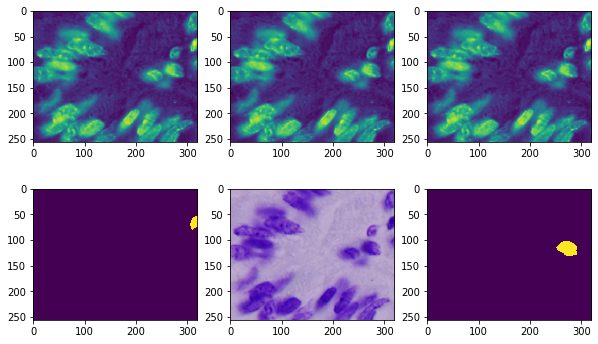

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# ax.set_title('fgx')
ax[0][0].imshow(hed_img[:, :, 0])
ax[0][1].imshow(hed_img[:, :, 1])
ax[0][2].imshow(hed_img[:, :, 2])
ax[1][0].imshow(purple_mask_colls[1][0])
ax[1][1].imshow(stain_img)
ax[1][2].imshow(purple_mask_colls[1][4])

_Use imported function instead_

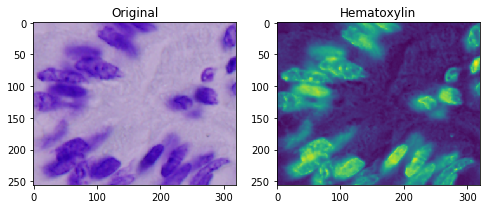

In [14]:
from functions.colors import unmix_purple_img
unmixed_purple = unmix_purple_img(purple_img_objs[1], True)

# Extend Experiment to Pink-Purple Images

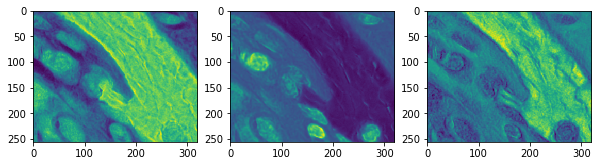

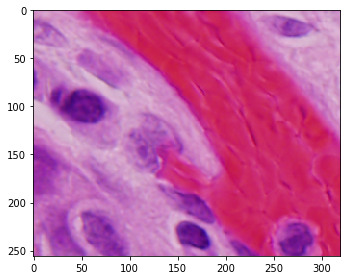

In [15]:
pink_img = io.imread(pink_img_paths[1])
pink_img = pink_img[:, :, [0, 1, 2]]

pink_rbd = separate_stains(pink_img, rbd_from_rgb)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax[0].imshow(pink_rbd[:, :, 0])
ax[1].imshow(pink_rbd[:, :, 1])
ax[2].imshow(pink_rbd[:, :, 2])
plt.figure()
io.imshow(pink_img)

* Test quantitative differences between images (array comparisons)

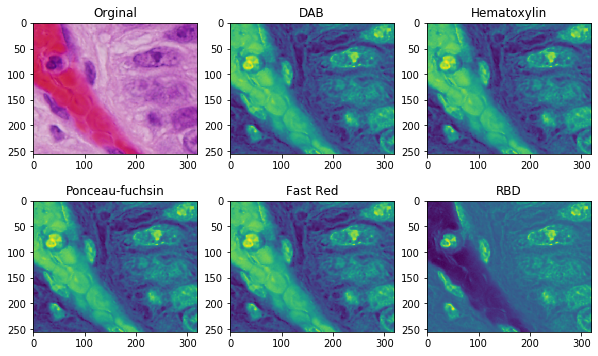

In [16]:
# define some test matrices
dab_matrix = np.ones((3,3)) * (0.268, 0.570, 0.776)
hematoxylin_matrix = np.ones((3,3)) * (0.644, 0.717, 0.267)
ponceau_matrix = np.ones((3,3)) * (0.100, 0.737, 0.668)
fast_red_matrix = np.ones((3,3)) * (0.214, 0.851, 0.478)
green_matrix = np.ones((3,3)) * (0.980, 0.144, 0.133)

pink_img = io.imread(pink_img_paths[0])
pink_img = pink_img[:, :, :-1]

# separate stains using test matrices
pink_dab = separate_stains(pink_img, dab_matrix)
pink_hema = separate_stains(pink_img, hematoxylin_matrix)
pink_ponc = separate_stains(pink_img, ponceau_matrix)
pink_fRed = separate_stains(pink_img, fast_red_matrix)
pink_rbd = separate_stains(pink_img, rbd_from_rgb)
pink_green = separate_stains(pink_img, green_matrix)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,6))

ax[0][0].set_title("Orginal")
ax[0][0].imshow(pink_img)

ax[0][1].set_title("DAB")
ax[0][1].imshow(pink_dab[:, :, 2])

ax[0][2].set_title("Hematoxylin")
ax[0][2].imshow(pink_hema[:, :, 1])

ax[1][0].set_title("Ponceau-fuchsin")
ax[1][0].imshow(pink_ponc[:, :, 0])

ax[1][1].set_title("Fast Red")
ax[1][1].imshow(pink_fRed[:, :, 0])

ax[1][2].set_title("RBD")
ax[1][2].imshow(pink_rbd[:, :, 1])

In [17]:
comparison = pink_dab == pink_hema
is_equal = comparison.all()
print(is_equal)

False


_Use imported function instead_

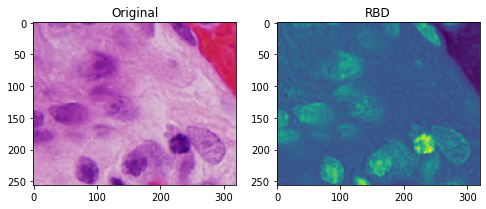

In [18]:
from functions.colors import unmix_pink_imgs
unmixed_pink = unmix_pink_imgs(pink_img_objs[3], loud=True)

# Compute Average Size of Nuclei in an Image

In [19]:
size = 0
for mask in mask_colls[0]:
    size += np.sum(mask != 0)
size = size / len(mask_colls[0])
print(size)

238.93103448275863


In [20]:
def compute_avg_size(img_name, loud=False):
    data_dir = f"{training_imgs_dir}{img_name}/masks/*.png"
    mask_coll = io.collection.ImageCollection(data_dir)
    size = 0
    
    for mask in mask_coll:
        size += np.sum(mask != 0)
        
    size = size / len(mask_coll)
    return size